In [140]:
import pandas as pd

df = pd.read_csv("./x_direct to y.csv")

df.info()
df.describe()
df.isna().sum()

## This code imports Data1 which includes Health scores on its own

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1000 non-null   float64
 1   BMI                  1000 non-null   float64
 2   Exercise_Frequency   1000 non-null   int64  
 3   Diet_Quality         1000 non-null   float64
 4   Sleep_Hours          1000 non-null   float64
 5   Smoking_Status       1000 non-null   int64  
 6   Alcohol_Consumption  1000 non-null   float64
 7   Health_Score         1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


Age                    0
BMI                    0
Exercise_Frequency     0
Diet_Quality           0
Sleep_Hours            0
Smoking_Status         0
Alcohol_Consumption    0
Health_Score           0
dtype: int64

In [141]:
from sklearn.preprocessing import StandardScaler

features = [
    "Age", "BMI", "Exercise_Frequency", "Diet_Quality",
    "Sleep_Hours", "Smoking_Status", "Alcohol_Consumption"
]

X = df[features]
y = df["Health_Score"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## This code try to fit data1 into Linear Regression

In [142]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)
print("R²:", r2_score(y, y_pred))

## This part of code prints R^2 of the Linear Regression

R²: 0.833863602081996


In [143]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error

df = pd.read_csv("./x_direct to y.csv")

features = [
    "Age", "BMI", "Exercise_Frequency", "Diet_Quality",
    "Sleep_Hours", "Smoking_Status", "Alcohol_Consumption"
]
target = "Health_Score"

X = df[features].copy()
y = df[target].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(
        hidden_layer_sizes=(16, 16), # size of hidden layers(1st hidden layer size, 2nd hidden layer size, ...)
        activation="relu", # activation function: relu(z) = x when x>=0, 0 when x < 0
        solver="adam", # update weight(optimization algorithm)
        alpha=1e-3, # normalization coefficient
        learning_rate_init=1e-3, # initial-learning-rate
        max_iter=5000, # maximum interation number
        early_stopping=True, # early stop (preventing overfitting)
        validation_fraction=0.2, # validation set size
        n_iter_no_change=50, # stop if there's no advancement in accuracy when checking via validation set
        random_state=42 # random seed
    ))
])

pipe.fit(X_train, y_train)

pred_train = pipe.predict(X_train)
pred_test = pipe.predict(X_test)

def reg_report(name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"[{name}] R²={r2:.4f} | MAE={mae:.3f} | RMSE={rmse:.3f}")

reg_report("TRAIN", y_train, pred_train)
reg_report("TEST ", y_test,  pred_test)

mlp = pipe.named_steps["mlp"]
print("iters:", mlp.n_iter_)
print("loss:", mlp.loss_)

## This part of code trains MLP model based on the data1
## Then it prints R^2, MAE, RMSE values and other statistics of MLP model

[TRAIN] R²=0.9085 | MAE=3.257 | RMSE=4.097
[TEST ] R²=0.8735 | MAE=3.794 | RMSE=4.967
iters: 1575
loss: 7.648807078445247


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 2 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 5 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


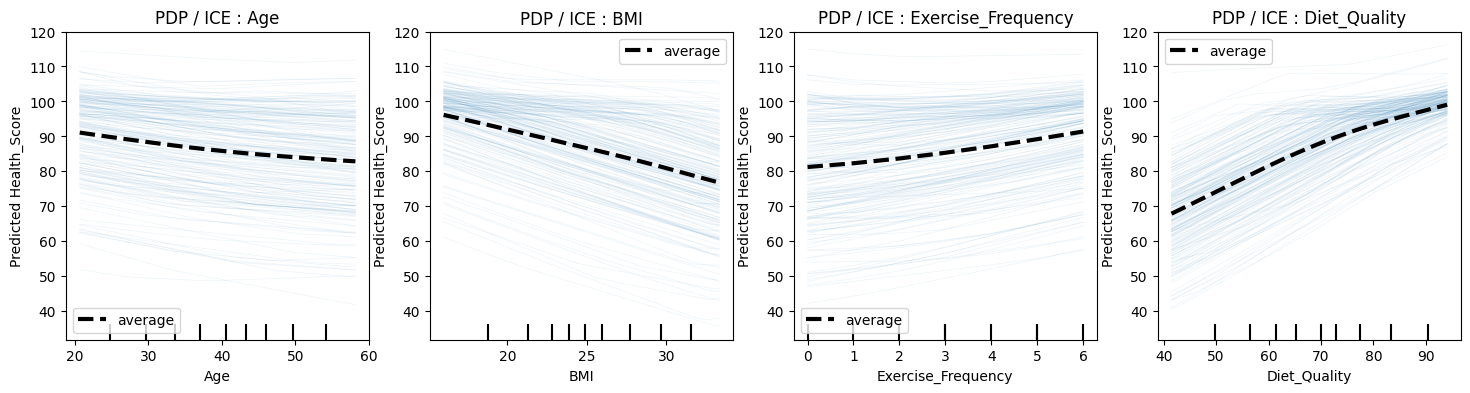

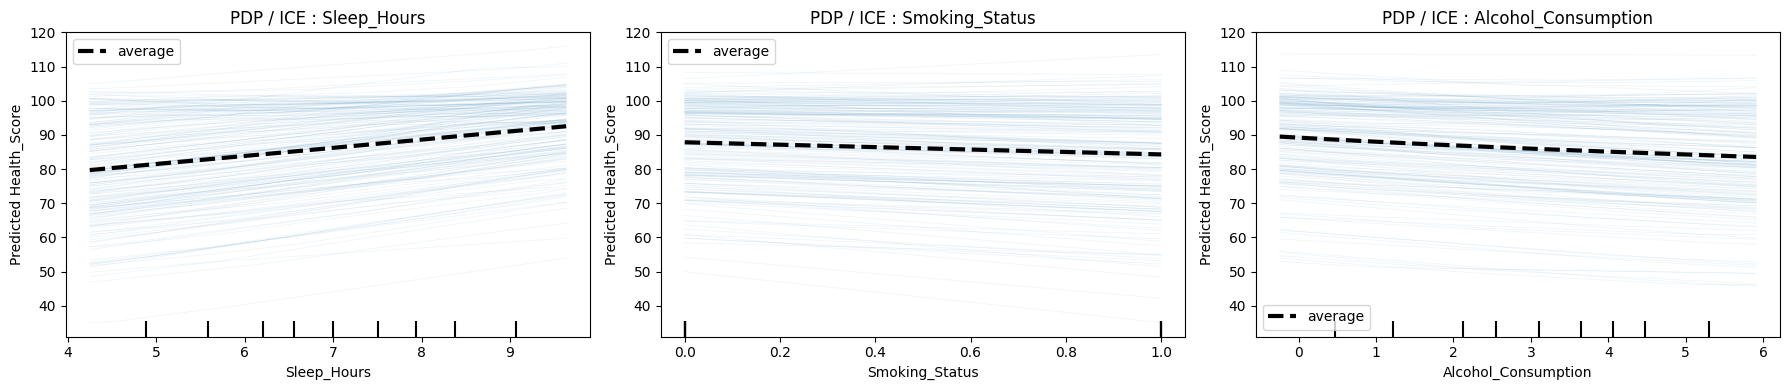

In [144]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

X_plot = X_test.copy()
targets = ["Age", "BMI", "Exercise_Frequency", "Diet_Quality"]
fig, ax = plt.subplots(1, 4, figsize=(18, 4))

PartialDependenceDisplay.from_estimator(
    pipe,
    X_plot,
    features=targets,
    kind="both",              # PDP + ICE
    grid_resolution=50,
    ice_lines_kw={"alpha": 0.08},
    pd_line_kw={"linewidth": 3, "color": "black"},
    ax=ax
)

for a, t in zip(ax, targets):
    a.set_title(f"PDP / ICE : {t}")
    a.set_ylabel("Predicted Health_Score")


targets = ["Sleep_Hours", "Smoking_Status", "Alcohol_Consumption"]
fig, ax = plt.subplots(1, 3, figsize=(18, 4))

PartialDependenceDisplay.from_estimator(
    pipe,
    X_plot,
    features=targets,
    kind="both",              # PDP + ICE
    grid_resolution=50,
    ice_lines_kw={"alpha": 0.08},
    pd_line_kw={"linewidth": 3, "color": "black"},
    ax=ax
)

for a, t in zip(ax, targets):
    a.set_title(f"PDP / ICE : {t}")
    a.set_ylabel("Predicted Health_Score")

plt.tight_layout()
plt.show()

## This code prints all 7 factors ICE/PDP graph
## To make each graph easier-to-read, we divided into 4-3 group and run the exact same code just twice.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 2 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 5 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(
/Library/Framework

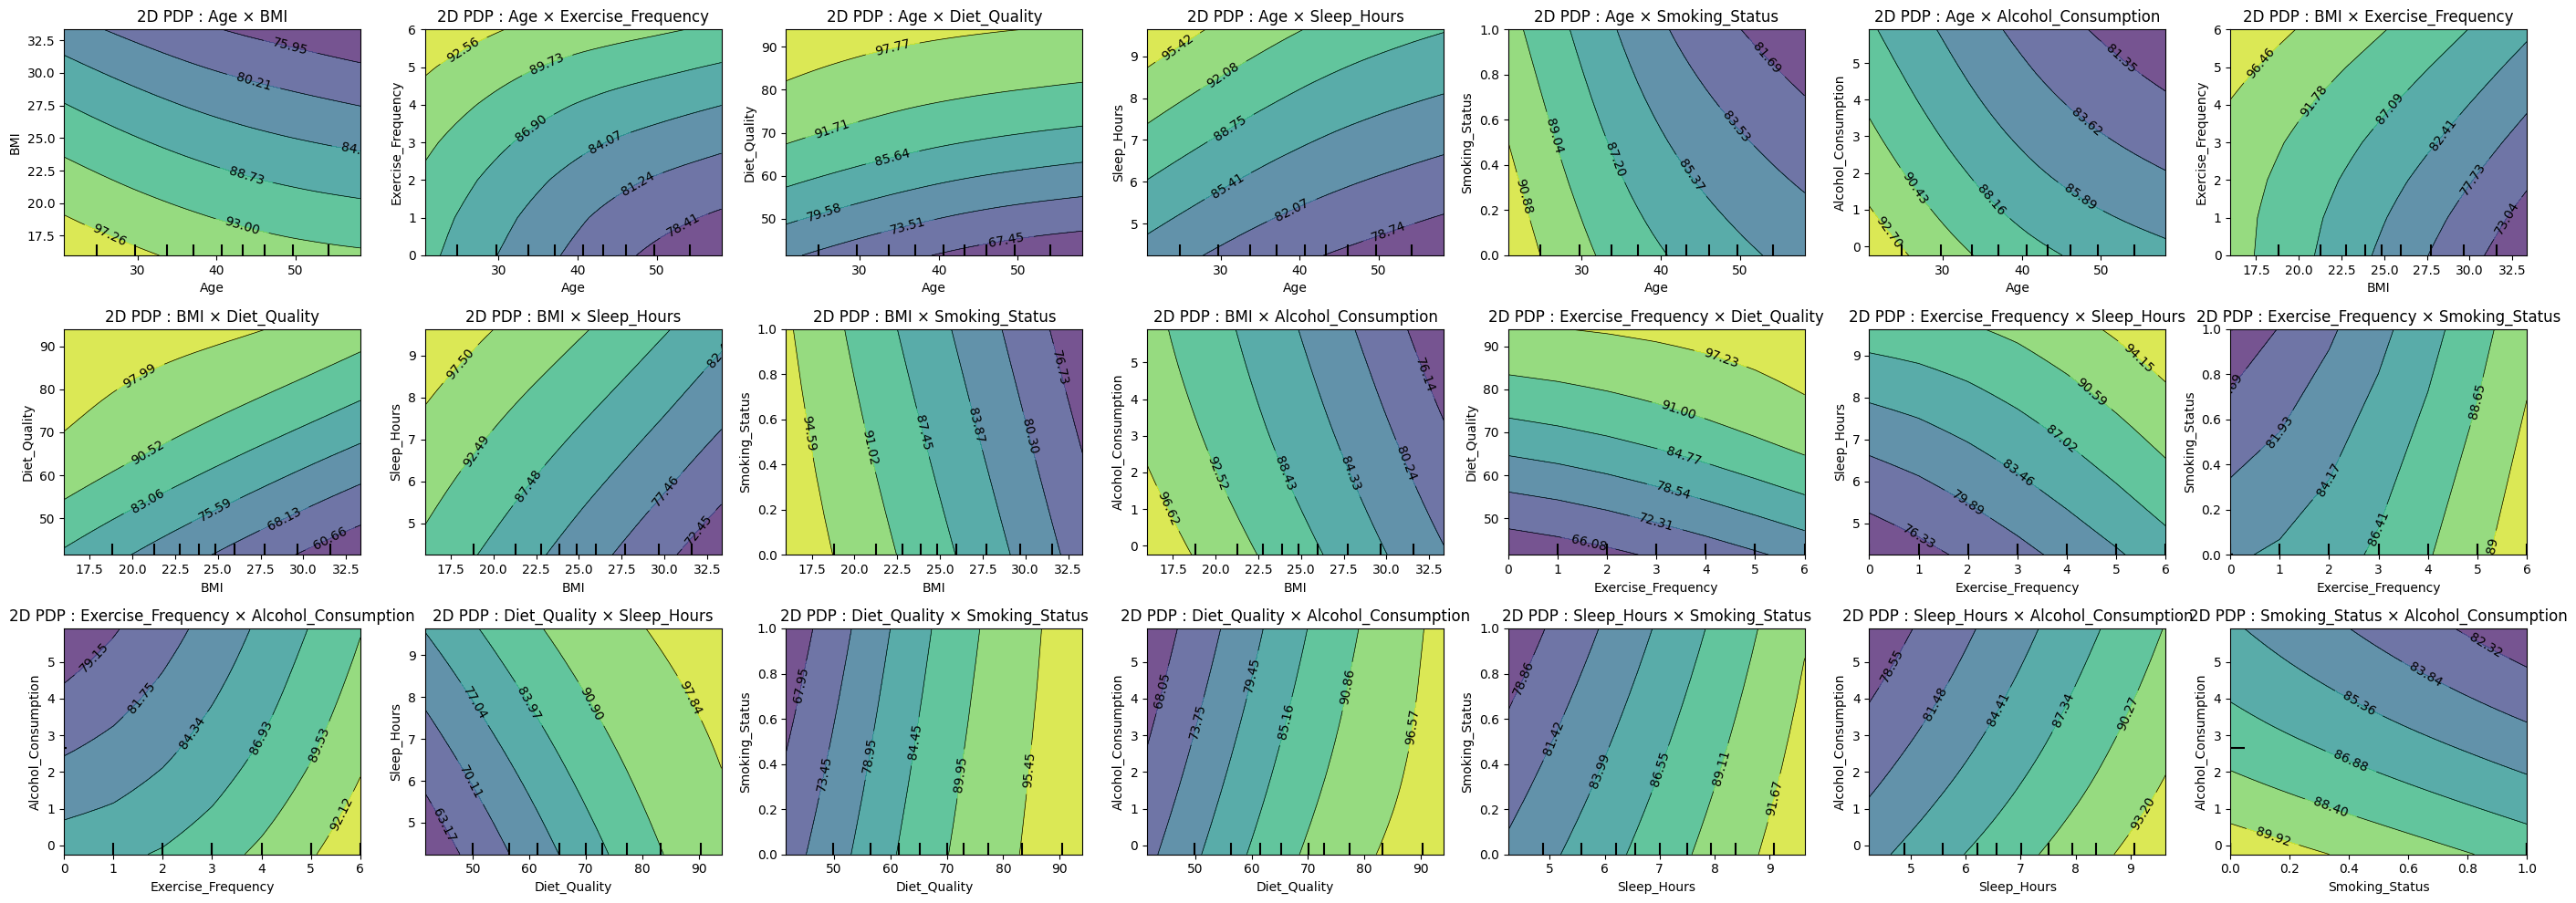

In [145]:
import itertools

features = [c for c in df.columns if c != "Health_Score"]

pairs = list(itertools.combinations(features, 2))

fig, axes = plt.subplots(3, 7, figsize=(28, 10))
axes = axes.flatten()

for idx, pair in enumerate(pairs):
    ax = axes[idx]

    PartialDependenceDisplay.from_estimator(
        pipe,
        X_plot,
        features=[pair],
        grid_resolution=40,
        ax=ax
    )
    ax.set_title(f"2D PDP : {pair[0]} × {pair[1]}")

plt.tight_layout()
plt.show()

## All combinations of factors is 21 (= 7 C 2)
## This code prints all PDP graph of each combination of factors.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 2 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 5 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(
/Library/Framework

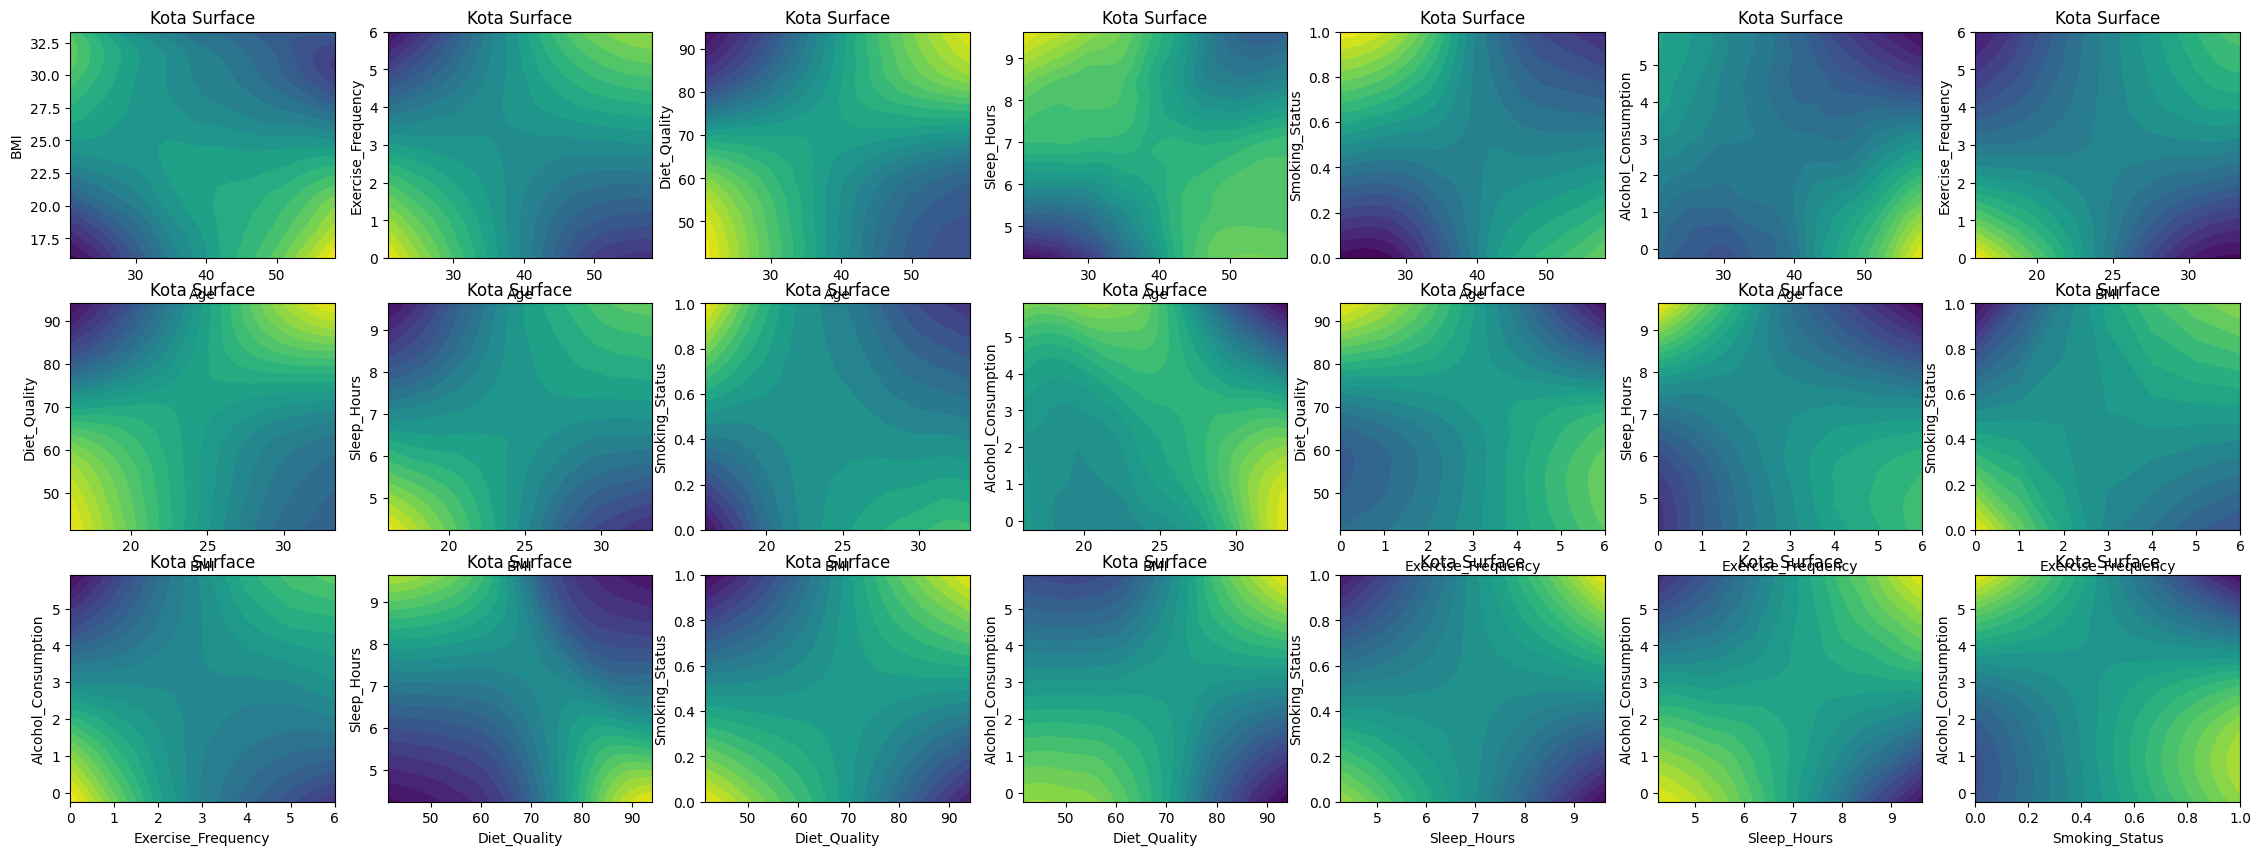

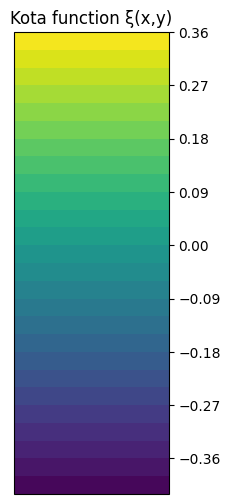

<Figure size 640x480 with 0 Axes>

In [146]:
from sklearn.inspection import partial_dependence

fig, axes = plt.subplots(3, 7, figsize=(28, 10))
axes = axes.flatten()
features = [c for c in df.columns if c != "Health_Score"]
pairs = list(itertools.combinations(features, 2))

for idx, pair in enumerate(pairs):
    ax = axes[idx]

    x_name, y_name = pair[0], pair[1]
    ix = X_plot.columns.get_loc(x_name)
    iy = X_plot.columns.get_loc(y_name)

    res_2d = partial_dependence(
        pipe,
        X_plot,
        features=[(ix, iy)],
        grid_resolution=40,
        kind="average"
    )
    x_grid, y_grid = res_2d["grid_values"]
    Z = res_2d["average"][0]

    res_1d = partial_dependence(
        pipe,
        X_plot,
        features=[ix],
        grid_resolution=40,
        kind="average"
    )
    x_grid_x = res_1d["grid_values"][0]
    z_vals_x = res_1d["average"][0]

    res_1d = partial_dependence(
        pipe,
        X_plot,
        features=[iy],
        grid_resolution=40,
        kind="average"
    )
    y_grid_y = res_1d["grid_values"][0]
    z_vals_y = res_1d["average"][0]

    # note here
    Zc = Z - Z.mean()
    zx = z_vals_x - z_vals_x.mean()
    zy = z_vals_y - z_vals_y.mean()

    if np.array_equal(x_grid, x_grid_x):
        zx_on_2d = zx
    else:
        zx_on_2d = np.interp(x_grid, x_grid_x, zx)

    if np.array_equal(y_grid, y_grid_y):
        zy_on_2d = zy
    else:
        zy_on_2d = np.interp(y_grid, y_grid_y, zy)

    h = Zc - (zx_on_2d[:, None] + zy_on_2d[None, :])

    ax.contourf(x_grid, y_grid, h.T, levels = 25)
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.set_title("Kota Surface")

fig_cb, ax_cb = plt.subplots(figsize=(2, 6))
fig_cb.colorbar(cf, cax=ax_cb)
ax_cb.set_title("Kota function ξ(x,y)")
plt.show()

plt.tight_layout()
plt.show()

## This code calculates Kota function, which indicates interaction between two factors.
## Kota function is a deviation of interaction score, which means we have to subtract mean values while calculating (marked as 'noted here' above)
## Of course, kota function should have 21 pairs

[(np.int64(0), np.float64(4.2451174847851085), np.float64(0.594218196826958)), (np.int64(0), np.float64(4.3833822803199425), np.float64(0.5664137588752283)), (np.int64(0), np.float64(4.521647075854776), np.float64(0.5391117102196574)), (np.int64(0), np.float64(4.65991187138961), np.float64(0.509860141508895)), (np.int64(0), np.float64(4.798176666924444), np.float64(0.4798503088230177)), (np.int64(0), np.float64(4.936441462459278), np.float64(0.44773128954076924)), (np.int64(0), np.float64(5.074706257994112), np.float64(0.41516698864647594)), (np.int64(0), np.float64(5.212971053528945), np.float64(0.37951332696580664)), (np.int64(0), np.float64(5.351235849063779), np.float64(0.34680664640387704)), (np.int64(0), np.float64(5.489500644598613), np.float64(0.3147030200884444))]


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column (5, 4) contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 5 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


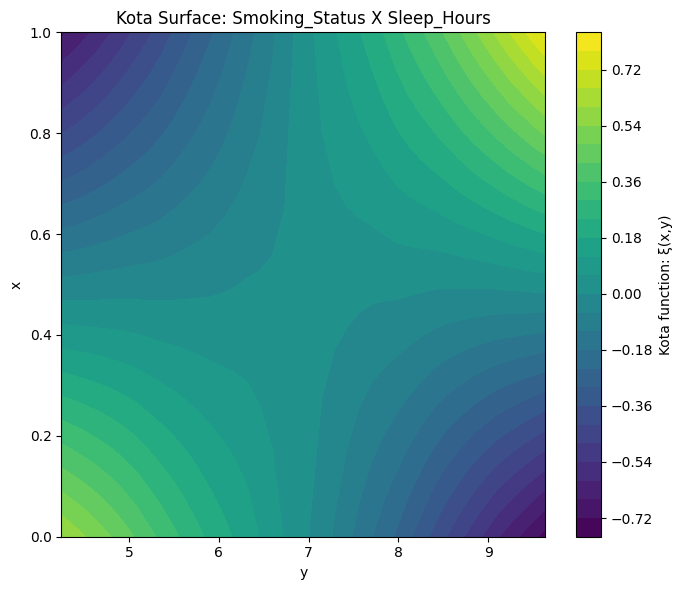

In [147]:
from sklearn.inspection import partial_dependence

x_name, y_name = "Smoking_Status", "Sleep_Hours"
ix = X_plot.columns.get_loc(x_name)
iy = X_plot.columns.get_loc(y_name)

res_2d = partial_dependence(
    pipe,
    X_plot,
    features=[(ix, iy)],
    grid_resolution=40,
    kind="average"
)
x_grid, y_grid = res_2d["grid_values"]
Z = res_2d["average"][0]

var_name = "Smoking_Status"
i = X_plot.columns.get_loc(var_name)

res_1d = partial_dependence(
    pipe,
    X_plot,
    features=[i],
    grid_resolution=40,
    kind="average"
)
x_grid_x = res_1d["grid_values"][0]
z_vals_x = res_1d["average"][0]

var_name = "Sleep_Hours"
i = X_plot.columns.get_loc(var_name)

res_1d = partial_dependence(
    pipe,
    X_plot,
    features=[i],
    grid_resolution=40,
    kind="average"
)
y_grid_y = res_1d["grid_values"][0]
z_vals_y = res_1d["average"][0]

# 중성화
Zc = Z - Z.mean()
zx = z_vals_x - z_vals_x.mean()
zy = z_vals_y - z_vals_y.mean()

if np.array_equal(x_grid, x_grid_x):
    zx_on_2d = zx
else:
    zx_on_2d = np.interp(x_grid, x_grid_x, zx)

if np.array_equal(y_grid, y_grid_y):
    zy_on_2d = zy
else:
    zy_on_2d = np.interp(y_grid, y_grid_y, zy)

h = Zc - (zx_on_2d[:, None] + zy_on_2d[None, :])

xyh = []
for i, x in enumerate(x_grid):
    for j, y in enumerate(y_grid):
        xyh.append((x, y, h[i, j]))

print(xyh[:10])

plt.figure(figsize=(7, 6))
plt.contourf(y_grid, x_grid, h, levels=25)
plt.colorbar(label="Kota function: ξ(x,y)")
plt.xlabel("y")
plt.ylabel("x")
plt.title(f"Kota Surface: {x_name} X {y_name}")
plt.tight_layout()
plt.show()

## This code prints just one Kota function of combinations
## (Not that important :))

In [148]:
class PDPInterpolator:
    def __init__(self, estimator, X_ref, grid_resolution=40):
        self.estimator = estimator
        self.X_ref = X_ref
        self.grid_resolution = grid_resolution

        self._cache_1d = {}  # feature_name -> (grid, vals)
        self._cache_2d = {}  # (f1,f2) -> (xgrid, ygrid, Z)

    def _get_1d(self, feature_name):
        if feature_name in self._cache_1d:
            return self._cache_1d[feature_name]

        i = self.X_ref.columns.get_loc(feature_name)

        res = partial_dependence(
            self.estimator,
            self.X_ref,
            features=[i],
            grid_resolution=self.grid_resolution,
            kind="average"
        )

        grid = np.asarray(res["grid_values"][0], dtype=float)
        vals = np.asarray(res["average"][0], dtype=float)  # (len(grid),)

        order = np.argsort(grid)
        grid, vals = grid[order], vals[order]

        self._cache_1d[feature_name] = (grid, vals)
        return grid, vals

    def _get_2d(self, f1, f2):
        key = (f1, f2)
        if key in self._cache_2d:
            return self._cache_2d[key]

        i = self.X_ref.columns.get_loc(f1)
        j = self.X_ref.columns.get_loc(f2)

        res = partial_dependence(
            self.estimator,
            self.X_ref,
            features=[(i, j)],
            grid_resolution=self.grid_resolution,
            kind="average"
        )

        xgrid = np.asarray(res["grid_values"][0], dtype=float)
        ygrid = np.asarray(res["grid_values"][1], dtype=float)
        Z = np.asarray(res["average"][0], dtype=float)  # (len(xgrid), len(ygrid))

        ix = np.argsort(xgrid)
        iy = np.argsort(ygrid)
        xgrid = xgrid[ix]
        ygrid = ygrid[iy]
        Z = Z[np.ix_(ix, iy)]

        self._cache_2d[key] = (xgrid, ygrid, Z)
        return xgrid, ygrid, Z

    def eval_1d(self, feature_name, x, clamp=True):
        grid, vals = self._get_1d(feature_name)
        x = float(x)

        if clamp:
            if x <= grid[0]:
                return float(vals[0])
            if x >= grid[-1]:
                return float(vals[-1])

        return float(np.interp(x, grid, vals))

    def eval_2d(self, f1, f2, x, y, clamp=True):
        xgrid, ygrid, Z = self._get_2d(f1, f2)
        x = float(x)
        y = float(y)

        if clamp:
            x = min(max(x, xgrid[0]), xgrid[-1])
            y = min(max(y, ygrid[0]), ygrid[-1])

        ix = np.searchsorted(xgrid, x) - 1
        iy = np.searchsorted(ygrid, y) - 1
        ix = int(np.clip(ix, 0, len(xgrid)-2))
        iy = int(np.clip(iy, 0, len(ygrid)-2))

        x0, x1 = xgrid[ix], xgrid[ix+1]
        y0, y1 = ygrid[iy], ygrid[iy+1]

        tx = 0.0 if x1 == x0 else (x - x0) / (x1 - x0)
        ty = 0.0 if y1 == y0 else (y - y0) / (y1 - y0)

        z00 = Z[ix,   iy]
        z10 = Z[ix+1, iy]
        z01 = Z[ix,   iy+1]
        z11 = Z[ix+1, iy+1]

        z0 = z00*(1-tx) + z10*tx
        z1 = z01*(1-tx) + z11*tx
        z  = z0*(1-ty)  + z1*ty
        return float(z)
    
## In this class, it makes pdp graph continuous function to figure out inverse of the pdp graph
## this class is used below this part frequently

In [149]:
pdp_fun = PDPInterpolator(pipe, X_plot, grid_resolution=40)

print("E[H | BMI=24.7] =", pdp_fun.eval_1d("BMI", 24.7))
print("E[H | Sleep=6.3] =", pdp_fun.eval_1d("Sleep_Hours", 6.3))

print("E[H | BMI=24.7, Exercise=3] =",
      pdp_fun.eval_2d("BMI", "Exercise_Frequency", 24.7, 3.0))

## This is how to use class above.

E[H | BMI=24.7] = 86.9326880328119
E[H | Sleep=6.3] = 84.5614082540034
E[H | BMI=24.7, Exercise=3] = 86.07161667008273


In [150]:
df1 = pd.read_csv("./x_direct to y.csv")
df2 = pd.read_csv("./data2.csv")

features_1 = [
    "Age",
    "BMI",
    "Exercise_Frequency",
    "Diet_Quality",
    "Sleep_Hours",
    "Smoking_Status",
    "Alcohol_Consumption"
]

target = "Health_Score"
common_features = [c for c in features_1 if c in df2.columns]
df2_filtered = df2[common_features].copy()
df2_filtered["n_available"] = df2_filtered.notna().sum(axis=1)
df2_usable = df2_filtered[df2_filtered["n_available"] >= 2].copy()
df2_usable.drop(columns="n_available", inplace=True)

print("=== Preprocessing Result Summary ===")
print("df1 factors:", features_1)
print("factors remained in df2:", common_features)
print("available columns:", len(df2_usable))
print("\nNas:")
print(df2_usable.isna().sum())

## This code preprocess the data2 in the way mentioned in our presentation

=== Preprocessing Result Summary ===
df1 factors: ['Age', 'BMI', 'Exercise_Frequency', 'Diet_Quality', 'Sleep_Hours', 'Smoking_Status', 'Alcohol_Consumption']
factors remained in df2: ['Age', 'BMI', 'Sleep_Hours']
available columns: 1000

Nas:
Age            0
BMI            0
Sleep_Hours    0
dtype: int64


In [151]:
import numpy as np

score_pair = ("BMI", "Sleep_Hours")
missing_vars = ["Exercise_Frequency", "Diet_Quality", "Smoking_Status", "Alcohol_Consumption"]
anchor = "BMI"

def invert_from_2dpdp(pdp_fun, anchor_name, anchor_val, var_name, H_star,
                     v_min=None, v_max=None, n_grid=200, discrete=False):

    if v_min is None:
        v_min = float(X_plot[var_name].min())
    if v_max is None:
        v_max = float(X_plot[var_name].max())

    v_grid = np.linspace(v_min, v_max, n_grid)

    z = np.array([pdp_fun.eval_2d(anchor_name, var_name, anchor_val, v) for v in v_grid], dtype=float)

    if discrete:
        candidates = np.array([0.0, 1.0])
        z_cand = np.array([pdp_fun.eval_2d(anchor_name, var_name, anchor_val, c) for c in candidates], dtype=float)
        return float(candidates[np.argmin(np.abs(z_cand - H_star))])

    if z[-1] >= z[0]:
        z_sorted = z
        v_sorted = v_grid
    else:
        z_sorted = z[::-1]
        v_sorted = v_grid[::-1]

    if H_star <= z_sorted[0]:
        return float(v_sorted[0])
    if H_star >= z_sorted[-1]:
        return float(v_sorted[-1])

    return float(np.interp(H_star, z_sorted, v_sorted))

df2_filled = df2_usable.copy()

df2_filled["H_star_pdp"] = [
    pdp_fun.eval_2d(score_pair[0], score_pair[1], row[score_pair[0]], row[score_pair[1]])
    for _, row in df2_filled.iterrows()
]

for var in missing_vars:
    discrete = (var == "Smoking_Status")

    df2_filled[var + "_pseudo"] = [
        invert_from_2dpdp(
            pdp_fun=pdp_fun,
            anchor_name=anchor,
            anchor_val=row[anchor],
            var_name=var,
            H_star=row["H_star_pdp"],
            n_grid=200,
            discrete=discrete
        )
        for _, row in df2_filled.iterrows()
    ]

    if var == "Exercise_Frequency":
        df2_filled[var + "_pseudo"] = (
            df2_filled[var + "_pseudo"].round().clip(0, 7).astype(int)
        )

    if var == "Smoking_Status":
        df2_filled[var + "_pseudo"] = df2_filled[var + "_pseudo"].round().clip(0, 1).astype(int)

print(df2_filled.head())
print("\nColumns Description:")
print(df2_filled[[c for c in df2_filled.columns if c.endswith("_pseudo")]].describe(include="all"))

# This code performs filling up Nas by using inverse function of PDP. In the way mentioned in our presentation.

   Age    BMI  Sleep_Hours  H_star_pdp  Exercise_Frequency_pseudo  \
0   56  30.72          8.6   84.332921                          5   
1   69  20.86          4.5   85.820191                          0   
2   46  30.93          4.3   72.344710                          0   
3   32  31.19          4.1   71.846279                          0   
4   60  29.37          5.1   76.584084                          1   

   Diet_Quality_pseudo  Smoking_Status_pseudo  Alcohol_Consumption_pseudo  
0            74.508391                      0                   -3.592506  
1            57.908448                      1                    8.687895  
2            59.070514                      1                    8.687895  
3            58.900512                      1                    8.687895  
4            61.708834                      1                    8.687895  

Columns Description:
       Exercise_Frequency_pseudo  Diet_Quality_pseudo  Smoking_Status_pseudo  \
count                1000.0

In [152]:
import numpy as np

ALCOHOL_MEDIAN = 2.945869

df2_filled = df2_usable.copy()
df2_filled["H_star_pdp"] = [
    pdp_fun.eval_2d(score_pair[0], score_pair[1],
                     row[score_pair[0]], row[score_pair[1]])
    for _, row in df2_filled.iterrows()
]
for var in missing_vars:
    if var == "Alcohol_Consumption":
        df2_filled[var + "_pseudo"] = ALCOHOL_MEDIAN
        continue

    discrete = (var == "Smoking_Status")

    df2_filled[var + "_pseudo"] = [
        invert_from_2dpdp(
            pdp_fun=pdp_fun,
            anchor_name=anchor,
            anchor_val=row[anchor],
            var_name=var,
            H_star=row["H_star_pdp"],
            n_grid=200,
            discrete=discrete
        )
        for _, row in df2_filled.iterrows()
    ]

    if var == "Exercise_Frequency":
        df2_filled[var + "_pseudo"] = (
            df2_filled[var + "_pseudo"].round().clip(0, 7).astype(int)
        )

    if var == "Smoking_Status":
        df2_filled[var + "_pseudo"] = (
            df2_filled[var + "_pseudo"].round().clip(0, 1).astype(int)
        )

print(df2_filled.head())
print("\nColumns Summary:")
print(df2_filled[[c for c in df2_filled.columns if c.endswith("_pseudo")]].describe(include="all"))

## Because our filling Nas up algorithm did not work well for Alcohol_Consumption Column, we decided to fill this column all same value(Median)

   Age    BMI  Sleep_Hours  H_star_pdp  Exercise_Frequency_pseudo  \
0   56  30.72          8.6   84.332921                          5   
1   69  20.86          4.5   85.820191                          0   
2   46  30.93          4.3   72.344710                          0   
3   32  31.19          4.1   71.846279                          0   
4   60  29.37          5.1   76.584084                          1   

   Diet_Quality_pseudo  Smoking_Status_pseudo  Alcohol_Consumption_pseudo  
0            74.508391                      0                    2.945869  
1            57.908448                      1                    2.945869  
2            59.070514                      1                    2.945869  
3            58.900512                      1                    2.945869  
4            61.708834                      1                    2.945869  

Columns Summary:
       Exercise_Frequency_pseudo  Diet_Quality_pseudo  Smoking_Status_pseudo  \
count                1000.00000

In [153]:
import pandas as pd
import numpy as np

features = [
    "Age", "BMI", "Exercise_Frequency", "Diet_Quality",
    "Sleep_Hours", "Smoking_Status", "Alcohol_Consumption"
]

df2_model = df2_filled.copy()

df2_model["Exercise_Frequency"]   = df2_model["Exercise_Frequency_pseudo"]
df2_model["Diet_Quality"]         = df2_model["Diet_Quality_pseudo"]
df2_model["Smoking_Status"]       = df2_model["Smoking_Status_pseudo"]
df2_model["Alcohol_Consumption"]  = df2_model["Alcohol_Consumption_pseudo"]

X2 = df2_model[features].copy()

df2_model["Health_MLP"] = pipe.predict(X2)
cols = [
    "Age", "BMI", "Sleep_Hours",
    "Exercise_Frequency", "Diet_Quality",
    "Smoking_Status", "Alcohol_Consumption",
    "Health_MLP"
]

print(df2_model[cols].head(10))

# In this code we predict Health score using data2 and MLP model which is trained above with data1.

   Age    BMI  Sleep_Hours  Exercise_Frequency  Diet_Quality  Smoking_Status  \
0   56  30.72          8.6                   5     74.508391               0   
1   69  20.86          4.5                   0     57.908448               1   
2   46  30.93          4.3                   0     59.070514               1   
3   32  31.19          4.1                   0     58.900512               1   
4   60  29.37          5.1                   1     61.708834               1   
5   25  31.14          6.5                   3     66.891392               1   
6   78  32.46          9.6                   6     78.406422               0   
7   38  28.62          6.7                   3     67.242191               1   
8   56  19.96          5.7                   2     61.427035               1   
9   75  26.55          7.4                   4     69.390527               0   

   Alcohol_Consumption  Health_MLP  
0             2.945869   91.784867  
1             2.945869   58.930371  
2       

In [154]:
mu = float(pipe.predict(X_plot).mean())

def main_effect_centered(pdp_fun, feature, x):
    return pdp_fun.eval_1d(feature, x) - mu

def interaction_kota(pdp_fun, f1, f2, x1, x2, mu):
    return (
        pdp_fun.eval_2d(f1, f2, x1, x2)
        - pdp_fun.eval_1d(f1, x1)
        - pdp_fun.eval_1d(f2, x2)
        + mu
    )

import itertools
pairs = list(itertools.combinations(features, 2))

Hpdp_list = []
for _, r in df2_model.iterrows():
    s = mu
    for f in features:
        s += main_effect_centered(pdp_fun, f, r[f])

    for (f1, f2) in pairs:
        s += interaction_kota(pdp_fun, f1, f2, r[f1], r[f2], mu)

    Hpdp_list.append(float(s))

df2_model["Health_PDP_Def"] = Hpdp_list

## In this code we calculate Health score by newly-defined health score prediction equation.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 2 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 5 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(
/Library/Framework

In [155]:
import numpy as np
import itertools

mu0 = float(pipe.predict(X_plot).mean())

pdp_mean_1d = {}
for f in features:
    xs = X_plot[f].to_numpy(dtype=float)
    pdp_vals = np.array([pdp_fun.eval_1d(f, x) for x in xs], dtype=float)
    pdp_mean_1d[f] = float(pdp_vals.mean())

pdp_mean_2d = {}
pairs = list(itertools.combinations(features, 2))
for f1, f2 in pairs:
    x1s = X_plot[f1].to_numpy(dtype=float)
    x2s = X_plot[f2].to_numpy(dtype=float)
    pdp2_vals = np.array([pdp_fun.eval_2d(f1, f2, a, b) for a, b in zip(x1s, x2s)], dtype=float)
    pdp_mean_2d[(f1, f2)] = float(pdp2_vals.mean())

def main_effect_centered_pdpmean(pdp_fun, feature, x, pdp_mean_1d):
    return pdp_fun.eval_1d(feature, x) - pdp_mean_1d[feature]

def interaction_kota_pdpmean(pdp_fun, f1, f2, x1, x2, pdp_mean_1d, pdp_mean_2d):
    mean_i = pdp_mean_1d[f1]
    mean_j = pdp_mean_1d[f2]
    mean_ij = pdp_mean_2d[(f1, f2)]
    return (
        pdp_fun.eval_2d(f1, f2, x1, x2)
        - pdp_fun.eval_1d(f1, x1)
        - pdp_fun.eval_1d(f2, x2)
        + mean_i + mean_j - mean_ij
    )

## In this code we calculate Health score by newly-defined health score prediction equation.
## And compare the health score result which are obtained in two different ways above.

In [156]:
df2_model["Diff"] = df2_model["Health_MLP"] - df2_model["Health_PDP_Def"]
df2_model["AbsDiff"] = df2_model["Diff"].abs()

print(df2_model[["Health_MLP","Health_PDP_Def","Diff","AbsDiff"]].head())
print("\nDifference Summary:")
print(df2_model["AbsDiff"].describe())

## This code prints the difference memtioned right above here

   Health_MLP  Health_PDP_Def      Diff   AbsDiff
0   91.784867       89.638558  2.146309  2.146309
1   58.930371       62.704718 -3.774347  3.774347
2   50.074640       45.900038  4.174602  4.174602
3   53.622888       50.941780  2.681108  2.681108
4   56.799699       54.198824  2.600875  2.600875

Difference Summary:
count    1000.000000
mean        1.850706
std         1.561571
min         0.001284
25%         0.674537
50%         1.507299
75%         2.677197
max        10.369535
Name: AbsDiff, dtype: float64


In [157]:
rmse = float(np.sqrt(np.mean(df2_model["Diff"].values**2)))
mae  = float(np.mean(df2_model["AbsDiff"].values))
print("MAE =", mae, "| RMSE =", rmse)

# And prints MAE, RMSE values

MAE = 1.8507061000676235 | RMSE = 2.420987391484833


In [158]:
Hpdp_list = []
for _, r in df2_model.iterrows():
    s = mu0 

    for f in features:
        s += main_effect_centered_pdpmean(pdp_fun, f, float(r[f]), pdp_mean_1d)

    for (f1, f2) in pairs:
        s += interaction_kota_pdpmean(
            pdp_fun, f1, f2,
            float(r[f1]), float(r[f2]),
            pdp_mean_1d, pdp_mean_2d
        )

    Hpdp_list.append(float(s))

df2_model["Health_PDP_Def"] = Hpdp_list

## This code is for calculating Health score again because we wanted to monitor if this code is working well.

In [159]:
print("mu0 (mean pipe.predict(X_plot)) =", mu0)

print("\n[1D PDP means vs mu0]")
for f in features:
    print(f"{f:>20s}  mean(PDP_1D)={pdp_mean_1d[f]:.6f}  diff={pdp_mean_1d[f]-mu0:+.6e}")

print("\n[2D PDP means vs mu0] (몇 개만 샘플)")
for k in list(pdp_mean_2d.keys())[:5]:
    print(f"{k} mean(PDP_2D)={pdp_mean_2d[k]:.6f} diff={pdp_mean_2d[k]-mu0:+.6e}")

## and this code prints the result of the code right above here.

mu0 (mean pipe.predict(X_plot)) = 86.20799006738923

[1D PDP means vs mu0]
                 Age  mean(PDP_1D)=86.189525  diff=-1.846506e-02
                 BMI  mean(PDP_1D)=86.351720  diff=+1.437296e-01
  Exercise_Frequency  mean(PDP_1D)=86.074305  diff=-1.336849e-01
        Diet_Quality  mean(PDP_1D)=86.634722  diff=+4.267316e-01
         Sleep_Hours  mean(PDP_1D)=86.256063  diff=+4.807289e-02
      Smoking_Status  mean(PDP_1D)=86.150575  diff=-5.741487e-02
 Alcohol_Consumption  mean(PDP_1D)=86.131745  diff=-7.624495e-02

[2D PDP means vs mu0] (몇 개만 샘플)
('Age', 'BMI') mean(PDP_2D)=86.362360 diff=+1.543697e-01
('Age', 'Exercise_Frequency') mean(PDP_2D)=86.059782 diff=-1.482085e-01
('Age', 'Diet_Quality') mean(PDP_2D)=86.589937 diff=+3.819469e-01
('Age', 'Sleep_Hours') mean(PDP_2D)=86.243663 diff=+3.567278e-02
('Age', 'Smoking_Status') mean(PDP_2D)=86.001067 diff=-2.069228e-01
